In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score

In [3]:
leads_df = pd.read_csv(r"F:\PGD_UpGrad\Machine_Learning_1\Lead_scoring_case_study\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads_df.shape

(9240, 37)

In [5]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

### Data Preparation

-  Null value treatment

In [6]:
round(leads_df.isnull().sum()*100/ leads_df.shape[0], 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

-  number of columns have more than 35% of missing values if we drop those value we lost amost half information so it is better to drop those columns instead of droping rows

In [7]:
for col in leads_df.columns:
    if (leads_df[col].isnull().sum()/leads_df.shape[0]) > 0.35:
        leads_df.drop(col,axis=1, inplace=True)

In [8]:
round(leads_df.isnull().sum()*100/ leads_df.shape[0], 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

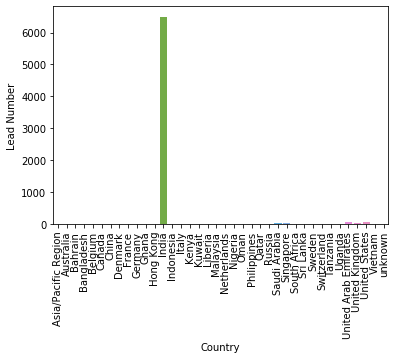

In [9]:
pivot_country = pd.pivot_table(leads_df, values='Lead Number',  index="Country", aggfunc=lambda x: len(x.unique())).reset_index()
country_plot = sns.barplot(x="Country", y="Lead Number", data=pivot_country)
country_plot.set_xticklabels(country_plot.get_xticklabels(), rotation=90)
plt.show()

In country column almost all teh entries are from india so it is does not contribute any unique value in to the analysis. It is better to drop the country columns instaed of lossing the information by droping null values and using country feature in analysis

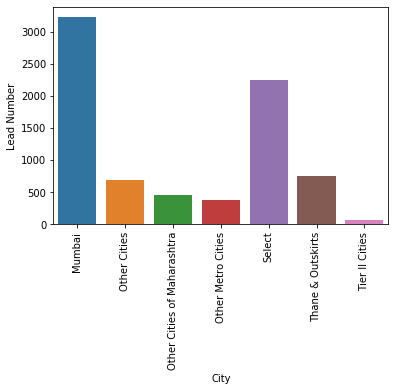

In [10]:
pivot_city = pd.pivot_table(leads_df, values='Lead Number',  index="City", aggfunc=lambda x: len(x.unique())).reset_index()
city_plot = sns.barplot(x="City", y="Lead Number", data=pivot_city)
city_plot.set_xticklabels(city_plot.get_xticklabels(), rotation=90)
plt.show()

In [11]:
(leads_df[leads_df.City == "Select"].shape[0] + leads_df.City.isnull().sum())/ leads_df.shape[0] *100

39.70779220779221

City has almost 40% of values which are either `Select` or `missing` so it is better to drop the City column. As if we carefully see the values from city columns these values are not giving any specific value they are in group and most of the city from single state.

In [12]:
leads_df = leads_df.drop(["Country", "City"], axis=1)

In [13]:
col_list = leads_df.columns
col_list

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [14]:
for x in col_list:
    print(leads_df[x].value_counts())
    print('-------------------------')

921e2da4-0433-4d22-8020-1dc349a1aa2d    1
31f88339-a9d5-4d1f-80a4-38a0aec28f3a    1
efbf4f2a-5652-4244-b89b-72b82e838285    1
3d33b191-f58d-43d6-b819-3fb5daa52ae9    1
f5a44e8a-d813-4d97-9adc-1b85aae69b87    1
cd395003-8649-402e-98e0-d49d94e29417    1
465a6156-4ea4-47e4-85fe-7e8afa1c916e    1
455a7865-c128-4e66-922d-00a6cd110e88    1
03c84178-3657-418e-8216-bda376580ccc    1
68233040-cafe-4d82-9e75-bbf2a0b32201    1
952e3f09-c296-4471-82c1-e38d1d49ef5a    1
d1af0b05-e77f-4111-811c-7c7abe1919e2    1
4d4cfb0c-87b5-4c64-b070-c1c0199c1ff1    1
5fe7762b-2963-4d1c-844d-eb2d04de4913    1
fdcdabd3-e0ff-485e-a4a1-afaf09ab9e7a    1
8de9dcc7-f06f-48fc-bd52-1285789eed78    1
c2199e3d-63f1-4520-a206-982a4b7668da    1
e41ad8b4-e650-48ea-83b8-a33bce8a0c0e    1
23f8584e-2c77-4fc8-8f24-a7bd75ee56f2    1
7fffe2d8-4570-4413-b3b9-f55854e3fb2a    1
75edf817-6a55-48eb-a795-4f5c396c3c4c    1
e69f51e1-3f00-457f-aca2-16f5d58bf76d    1
1f72e1a2-b2a3-4707-984c-589fd64dc479    1
38a3c9a8-1399-4654-be92-356d101acf

Most of the columns has only one value like `Search` has only 14 `Yes` values `Magazine` has all `No` values it is better do drop such columns.

In [15]:
col_to_drop = ["What matters most to you in choosing a course", "Search", "Magazine", "Newspaper Article", "X Education Forums",\
              "Newspaper", "Digital Advertisement", "Through Recommendations", "Receive More Updates About Our Courses", \
              "Update me on Supply Chain Content", "Get updates on DM Content", "I agree to pay the amount through cheque", \
              "Do Not Call"]

In [16]:
leads_df = leads_df.drop(col_to_drop, axis=1)

Also we can check that some features has select options like `Lead Profile` and `How did you hear about X Education` but most of the columns has value `select` means user can not select any of the options so it remain default select so we need to drop those columns whic has high ammount of `select` values

In [17]:
col_list = list(leads_df.columns)
for col in col_list:
    if leads_df[col].value_counts().index[0] == "Select":
        print(leads_df[col].value_counts())
        print('-----------------------')

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64
-----------------------
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                  

We see that `Lead Profile` and `How did you hear about X Education` have many select values so we can drop those columns 

In [18]:
leads_df = leads_df.drop(["How did you hear about X Education", "Lead Profile"], axis=1)

In [19]:
leads_df.isnull().sum()/ leads_df.shape[0] *100

Prospect ID                                0.000000
Lead Number                                0.000000
Lead Origin                                0.000000
Lead Source                                0.389610
Do Not Email                               0.000000
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Specialization                            15.562771
What is your current occupation           29.112554
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

In [20]:
leads_df.shape

(9240, 14)

Now we can drop all rows which has nnull values from dataset

In [21]:
leads_df = leads_df.dropna()

In [22]:
leads_df.isnull().sum()/ leads_df.shape[0] *100

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [23]:
leads_df.shape

(6373, 14)

We complete the data cleaning and we have 6373 values outoff 9240 with 14 features

### Dummy variable 

List out `Yes`, `No` type columns

In [24]:
bin_col = ["Do Not Email","A free copy of Mastering The Interview"]

In [25]:
leads_df[bin_col] = leads_df[bin_col].apply(lambda x : x.map({"Yes" : 1, "No" : 0}))

In [26]:
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Select,Unemployed,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,0,Modified


Before creating the dummy variables lets drop the `Prospect ID` and `Lead Number` these two columns does not have any use in model building 

In [27]:
leads_df = leads_df.drop(["Prospect ID", "Lead Number"], axis=1)
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Select,Unemployed,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,0,Modified


#### Create dummy varibales for `Object` columns

In [28]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 12 columns):
Lead Origin                               6373 non-null object
Lead Source                               6373 non-null object
Do Not Email                              6373 non-null int64
Converted                                 6373 non-null int64
TotalVisits                               6373 non-null float64
Total Time Spent on Website               6373 non-null int64
Page Views Per Visit                      6373 non-null float64
Last Activity                             6373 non-null object
Specialization                            6373 non-null object
What is your current occupation           6373 non-null object
A free copy of Mastering The Interview    6373 non-null int64
Last Notable Activity                     6373 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 647.3+ KB


In [29]:
obj_col = ["Lead Origin", "Lead Source", "Last Activity", "Specialization",\
           "What is your current occupation", "Last Notable Activity"]

In [30]:
leads_df_dummy = pd.get_dummies(leads_df[obj_col], drop_first=True)
leads_df_dummy = leads_df_dummy.drop("Specialization_Select", axis=1)
leads_df_dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [31]:
leads_df = pd.concat([leads_df, leads_df_dummy], axis=1)
leads_df = leads_df.drop(obj_col, axis=1)
leads_df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [32]:
X = leads_df.drop("Converted", axis=1)

In [33]:
y = leads_df["Converted"]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state =100)

In [35]:
X_train.shape

(4461, 73)

In [36]:
X_test.shape

(1912, 73)

In [37]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
8003,0,4.0,67,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
218,0,4.0,187,4.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4171,0,6.0,78,6.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4037,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3660,0,0.0,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


#### Scale the variables 

In [38]:
scalar = StandardScaler()
scale_var = ["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]
X_train[scale_var] = scalar.fit_transform(X_train[scale_var])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
8003,0,0.064874,-0.824395,-0.223652,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
218,0,0.064874,-0.611929,0.753710,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4171,0,0.431907,-0.804919,1.731071,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4037,0,-0.669191,-0.943022,-1.201013,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3660,0,-0.669191,-0.943022,-1.201013,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


#### Plot correlation matrix of the dataset

plt.figure(figsize=(40, 40))
sns.heatmap(leads_df.corr(), annot=True)
plt.show()

Ploting the matrix is heavy task for this dataset so we just see the correlation value without ploting them

In [39]:
leads_df.corr()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Do Not Email,1.000000,-0.148451,0.028900,-0.054778,0.036723,0.052271,0.081123,-0.027360,-0.017655,0.086261,-0.017980,-0.058344,-0.004796,-0.035661,0.030114,-0.003391,0.046285,-0.034833,-0.012227,-0.004796,-0.003391,0.009698,-0.005874,-0.003391,-0.056334,0.578942,-0.034551,0.065462,-0.207856,-0.004796,-0.014046,-0.005913,-0.040306,0.056875,-0.003163,0.012768,0.269995,-0.006783,-0.003391,-0.009139,0.023295,0.036547,-0.007458,0.021217,0.015065,-0.017078,0.048816,0.011698,-0.029050,0.011938,-0.012156,0.020802,0.026478,0.042738,-0.005422,0.048711,-0.010178,-0.000306,-0.011523,0.052291,-0.050486,0.325220,-0.031092,0.065462,-0.180244,-0.003391,-0.012237,0.077136,-0.006807,0.050062,-0.003515,-0.015930,0.258311,-0.003391
Converted,-0.148451,1.000000,0.005651,0.313338,-0.063362,-0.094833,-0.117563,0.288666,-0.019269,-0.133600,-0.021207,0.020205,0.018407,-0.044348,-0.034223,-0.012059,-0.012059,0.243200,-0.023501,0.000676,0.013015,0.144864,-0.006411,-0.012059,-0.138834,-0.134838,-0.033557,0.018407,-0.022391,0.018407,-0.036322,0.041575,-0.164168,-0.087121,0.285854,-0.021383,-0.032757,-0.011583,-0.012059,0.014468,-0.017955,-0.015443,0.027078,0.028249,-0.006080,0.025865,-0.005689,-0.024789,0.049520,-0.000862,0.031349,-0.018603,0.006964,-0.005142,0.005785,-0.011762,0.039068,0.011575,-0.034491,-0.259722,0.304859,-0.052371,-0.026291,0.018407,-0.010199,0.013015,0.046969,-0.239572,-0.039205,-0.032219,0.284301,0.050436,-0.026673,-0.012059
TotalVisits,0.028900,0.005651,1.000000,0.202551,0.489039,0.186583,0.267954,-0.208375,-0.043000,0.075252,-0.042052,0.085306,-0.012720,-0.247963,0.192469,-0.001549,0.0

### Model Building

#### Feature Selection using RFE

In [40]:
logreg = LogisticRegression()
rfe = RFE(logreg, 14)
rfe = rfe.fit(X_train, y_train)

In [41]:
rfe.support_

array([ True, False,  True, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True,  True,  True, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False])

In [42]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 39),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 43),
 ('A free copy of Mastering The Interview', False, 49),
 ('Lead Origin_Landing Page Submission', False, 20),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 48),
 ('Lead Source_Direct Traffic', False, 10),
 ('Lead Source_Facebook', False, 53),
 ('Lead Source_Google', False, 30),
 ('Lead Source_Live Chat', False, 44),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 29),
 ('Lead Source_Pay per Click Ads', False, 35),
 ('Lead Source_Press_Release', False, 55),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 31),
 ('Lead Source_Social Media', False, 60),
 ('Lead Source_WeLearn', False, 34),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 28),
 ('Lead Source_testone', False, 32),
 ('Last Activity_Converted to Lead', False, 15),
 ('Last Activity_E

In [43]:
col_support = X_train.columns[rfe.support_]
col_support

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [44]:
X_train_sm = sm.add_constant(X_train[col_support])
log_model1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
log_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2084.6
Date:                Mon, 18 Nov 2019   Deviance:                       4169.1
Time:                        18:40:20   Pearson chi2:                 4.86e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3962      0.596      0.665      0.506      -0.772       1.565
Do Not Email                                            -1.4612      0.191     -7.643      0.000      -1.836      -1.086
Total Time Spent on Website                              1.1048      0.046     24.115      0.000       1.015       1.195
Lead Origin_Lead Add Form                                2.7458      1.189      2.310      0.021       0.416       5.075
Lead Source_Olark Chat                                   1.2697      0.112     11.293      0.000       1.049       1.490
Lead Source_Reference                                    1.2955      1.213      1.068      0.285      -1.081       3.672
Lead Source_Welingak Website                             3.4119      1.557      2.192      0.028       0.361       6.463
Last Activity_Had a Phone Conversation                   1.0730      0.984      1.091      0.275      -0.855       3.001
Last Activity_SMS Sent                                   1.1677      0.082     14.231      0.000       1.007       1.328
What is your current occupation_Housewife               22.4326   2.46e+04      0.001      0.999   -4.82e+04    4.82e+04
What is your current occupation_Student                 -1.3201      0.633     -2.084      0.037      -2.561      -0.079
What is your current occupation_Unemployed              -1.4900      0.598     -2.491      0.013      -2.662      -0.318
What is your current occupation_Working Professional     1.1206      0.626      1.789      0.074      -0.107       2.348
Last Notable Activity_Had a Phone Conversation          23.3231   2.07e+04      0.001      0.999   -4.06e+04    4.06e+04
Last Notable Activity_Unreachable                        2.7698      0.806      3.435      0.001       1.189       4.350
========================================================================================================================
"""

#### Calculate VIF

In [45]:
vif = pd.DataFrame()
vif["Features"] = X_train[col_support].columns
vif["VIF"] = [variance_inflation_factor(X_train[col_support].values, i) for i in range(X_train[col_support].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,84.15
4,Lead Source_Reference,65.18
5,Lead Source_Welingak Website,20.03
6,Last Activity_Had a Phone Conversation,2.44
12,Last Notable Activity_Had a Phone Conversation,2.43
10,What is your current occupation_Unemployed,1.77
7,Last Activity_SMS Sent,1.59
3,Lead Source_Olark Chat,1.37
1,Total Time Spent on Website,1.27
11,What is your current occupation_Working Profes...,1.25


In [46]:
col_support = col_support.drop("Lead Origin_Lead Add Form")

In [47]:
X_train_sm = sm.add_constant(X_train[col_support])
log_model2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
log_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2087.8
Date:                Mon, 18 Nov 2019   Deviance:                       4175.6
Time:                        18:40:20   Pearson chi2:                 4.86e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3980      0.596      0.668      0.504      -0.770       1.565
Do Not Email                                            -1.4643      0.191     -7.666      0.000      -1.839      -1.090
Total Time Spent on Website                              1.0996      0.046     24.076      0.000       1.010       1.189
Lead Source_Olark Chat                                   1.2604      0.112     11.234      0.000       1.041       1.480
Lead Source_Reference                                    4.0311      0.259     15.544      0.000       3.523       4.539
Lead Source_Welingak Website                             6.1472      1.010      6.086      0.000       4.167       8.127
Last Activity_Had a Phone Conversation                   1.0693      0.983      1.088      0.277      -0.857       2.996
Last Activity_SMS Sent                                   1.1693      0.082     14.262      0.000       1.009       1.330
What is your current occupation_Housewife               22.4307   2.46e+04      0.001      0.999   -4.82e+04    4.82e+04
What is your current occupation_Student                 -1.3193      0.633     -2.085      0.037      -2.560      -0.079
What is your current occupation_Unemployed              -1.4862      0.598     -2.487      0.013      -2.657      -0.315
What is your current occupation_Working Professional     1.1195      0.626      1.789      0.074      -0.107       2.346
Last Notable Activity_Had a Phone Conversation          23.3194   2.07e+04      0.001      0.999   -4.06e+04    4.06e+04
Last Notable Activity_Unreachable                        2.7632      0.806      3.427      0.001       1.183       4.343
========================================================================================================================
"""

In [48]:
vif = pd.DataFrame()
vif["Features"] = X_train[col_support].columns
vif["VIF"] = [variance_inflation_factor(X_train[col_support].values, i) for i in range(X_train[col_support].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
5,Last Activity_Had a Phone Conversation,2.44
11,Last Notable Activity_Had a Phone Conversation,2.43
9,What is your current occupation_Unemployed,1.77
6,Last Activity_SMS Sent,1.59
2,Lead Source_Olark Chat,1.37
3,Lead Source_Reference,1.28
1,Total Time Spent on Website,1.27
10,What is your current occupation_Working Profes...,1.25
0,Do Not Email,1.09
4,Lead Source_Welingak Website,1.07


Some of the features have large p-values lets drop one by one 

In [49]:
col_support = col_support.drop("Last Notable Activity_Had a Phone Conversation")

In [50]:
X_train_sm = sm.add_constant(X_train[col_support])
log_model3 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
log_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2090.9
Date:                Mon, 18 Nov 2019   Deviance:                       4181.7
Time:                        18:40:20   Pearson chi2:                 4.86e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3984      0.596      0.669      0.503      -0.769       1.566
Do Not Email                                            -1.4640      0.191     -7.667      0.000      -1.838      -1.090
Total Time Spent on Website                              1.0977      0.046     24.053      0.000       1.008       1.187
Lead Source_Olark Chat                                   1.2583      0.112     11.219      0.000       1.038       1.478
Lead Source_Reference                                    4.0288      0.259     15.536      0.000       3.521       4.537
Lead Source_Welingak Website                             6.1449      1.010      6.083      0.000       4.165       8.125
Last Activity_Had a Phone Conversation                   2.8701      0.801      3.581      0.000       1.299       4.441
Last Activity_SMS Sent                                   1.1690      0.082     14.263      0.000       1.008       1.330
What is your current occupation_Housewife               21.4301   1.49e+04      0.001      0.999   -2.92e+04    2.93e+04
What is your current occupation_Student                 -1.3191      0.633     -2.085      0.037      -2.559      -0.079
What is your current occupation_Unemployed              -1.4859      0.597     -2.487      0.013      -2.657      -0.315
What is your current occupation_Working Professional     1.1177      0.626      1.786      0.074      -0.109       2.344
Last Notable Activity_Unreachable                        2.7620      0.806      3.426      0.001       1.182       4.342
========================================================================================================================
"""

In [51]:
vif = pd.DataFrame()
vif["Features"] = X_train[col_support].columns
vif["VIF"] = [variance_inflation_factor(X_train[col_support].values, i) for i in range(X_train[col_support].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,1.77
6,Last Activity_SMS Sent,1.59
2,Lead Source_Olark Chat,1.37
3,Lead Source_Reference,1.28
1,Total Time Spent on Website,1.27
10,What is your current occupation_Working Profes...,1.25
0,Do Not Email,1.09
4,Lead Source_Welingak Website,1.07
8,What is your current occupation_Student,1.03
5,Last Activity_Had a Phone Conversation,1.01


In [52]:
col_support = col_support.drop("What is your current occupation_Housewife")

In [53]:
X_train_sm = sm.add_constant(X_train[col_support])
log_model4 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
log_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2092.8
Date:                Mon, 18 Nov 2019   Deviance:                       4185.6
Time:                        18:40:21   Pearson chi2:                 4.87e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8900      0.549      1.620      0.105      -0.187       1.967
Do Not Email                                            -1.4668      0.191     -7.672      0.000      -1.842      -1.092
Total Time Spent on Website                              1.0973      0.046     24.051      0.000       1.008       1.187
Lead Source_Olark Chat                                   1.2568      0.112     11.206      0.000       1.037       1.477
Lead Source_Reference                                    4.0300      0.259     15.544      0.000       3.522       4.538
Lead Source_Welingak Website                             6.1445      1.010      6.083      0.000       4.165       8.124
Last Activity_Had a Phone Conversation                   2.8696      0.801      3.581      0.000       1.299       4.440
Last Activity_SMS Sent                                   1.1689      0.082     14.263      0.000       1.008       1.330
What is your current occupation_Student                 -1.8102      0.590     -3.069      0.002      -2.966      -0.654
What is your current occupation_Unemployed              -1.9771      0.552     -3.584      0.000      -3.058      -0.896
What is your current occupation_Working Professional     0.6265      0.582      1.076      0.282      -0.515       1.768
Last Notable Activity_Unreachable                        2.7601      0.806      3.423      0.001       1.180       4.341
========================================================================================================================
"""

In [54]:
col_support = col_support.drop("What is your current occupation_Working Professional")

In [55]:
X_train_sm = sm.add_constant(X_train[col_support])
log_model5 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
log_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4450
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2093.3
Date:                Mon, 18 Nov 2019   Deviance:                       4186.6
Time:                        18:40:21   Pearson chi2:                 4.84e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.4556      0.182      7.980      0.000       1.098       1.813
Do Not Email                                  -1.4649      0.191     -7.664      0.000      -1.839      -1.090
Total Time Spent on Website                    1.0975      0.046     24.052      0.000       1.008       1.187
Lead Source_Olark Chat                         1.2582      0.112     11.220      0.000       1.038       1.478
Lead Source_Reference                          4.0315      0.259     15.551      0.000       3.523       4.540
Lead Source_Welingak Website                   6.1445      1.010      6.083      0.000       4.165       8.124
Last Activity_Had a Phone Conversation         2.8718      0.801      3.584      0.000       1.301       4.442
Last Activity_SMS Sent                         1.1720      0.082     14.318      0.000       1.012       1.332
What is your current occupation_Student       -2.3768      0.280     -8.496      0.000      -2.925      -1.828
What is your current occupation_Unemployed    -2.5441      0.185    -13.739      0.000      -2.907      -2.181
Last Notable Activity_Unreachable              2.7616      0.806      3.425      0.001       1.181       4.342
==============================================================================================================
"""

In [94]:
vif = pd.DataFrame()
vif["Features"] = X_train[col_support].columns
vif["VIF"] = [variance_inflation_factor(X_train[col_support].values, i) for i in range(X_train[col_support].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
print(vif)

                                     Features   VIF
8  What is your current occupation_Unemployed  1.66
6                      Last Activity_SMS Sent  1.47
2                      Lead Source_Olark Chat  1.34
1                 Total Time Spent on Website  1.24
3                       Lead Source_Reference  1.16
0                                Do Not Email  1.08
4                Lead Source_Welingak Website  1.07
7     What is your current occupation_Student  1.02
5      Last Activity_Had a Phone Conversation  1.01
9           Last Notable Activity_Unreachable  1.00


Now, all P-values are low and VIF is also below 2 we can finalize the module and make prediction 

### Model evaluation

#### Prediction

In [57]:
y_train_pred = log_model5.predict(X_train_sm)
y_train_pred[:10].values

array([0.30548348, 0.14677303, 0.12218014, 0.29623327, 0.95606026,
       0.19343323, 0.19740497, 0.94899372, 0.08688726, 0.98238127])

In [58]:
y_train_pred_final = pd.DataFrame({"Converted": y_train, "Probability": y_train_pred})
y_train_pred_final["Predicted_Conv"] = y_train_pred_final.Probability.map(lambda x : 1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Probability,Predicted_Conv
8003,0,0.305483,0
218,0,0.146773,0
4171,1,0.122180,0
4037,1,0.296233,0
3660,1,0.956060,1


#### Plot the ROC curve and find the optimal cutoff

In [59]:
from sklearn import metrics
def draw_roc_curve(actual, prob):
    fpr, tpr, threshold = metrics.roc_curve(actual, prob, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, prob)
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [60]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Predicted_Conv, drop_intermediate = False )

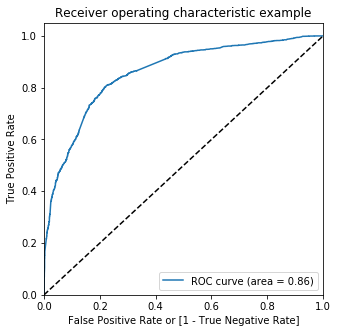

In [61]:
draw_roc_curve(y_train_pred_final.Converted, y_train_pred_final.Probability)

In [62]:
# Lets create columns with different cutoff points
numbers = [x/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Probability.map(lambda x : 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Probability,Predicted_Conv,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
8003,0,0.305483,0,1,1,1,1,0,0,0,0,0,0
218,0,0.146773,0,1,1,0,0,0,0,0,0,0,0
4171,1,0.122180,0,1,1,0,0,0,0,0,0,0,0
4037,1,0.296233,0,1,1,1,0,0,0,0,0,0,0
3660,1,0.956060,1,1,1,1,1,1,1,1,1,1,1


In [63]:
# Now calculate accuracy, sensitivity and specificity for variouse probability cuttoff
cutoff_df = pd.DataFrame(columns=['Probability', 'Accuracy', 'Sensitivity', 'Specificity'])
from sklearn.metrics import confusion_matrix

for i in numbers:
    conf_mat = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total = sum(sum(conf_mat))
    accuracy = (conf_mat[0,0]+conf_mat[1,1])/total
    
    sensitivity = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
    specificity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
    cutoff_df.loc[i] = [i, accuracy, sensitivity, specificity]
cutoff_df

,Probability,Accuracy,Sensitivity,Specificity
0.0,0.0,0.481731,1.000000,0.000000
0.1,0.1,0.517597,0.998604,0.070502
0.2,0.2,0.697153,0.941368,0.470156
0.3,0.3,0.764851,0.864588,0.672145
0.4,0.4,0.791302,0.805026,0.778547
0.5,0.5,0.785922,0.735226,0.833045
0.6,0.6,0.754539,0.622615,0.877163
0.7,0.7,0.735485,0.542578,0.914792
0.8,0.8,0.708810,0.446254,0.952855
0.9,0.9,0.642233,0.275942,0.982699


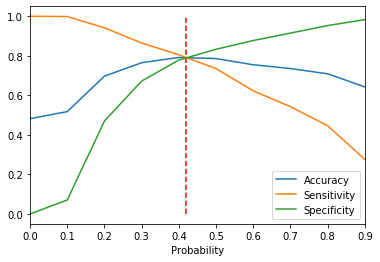

In [64]:
# lets plot the accuracy, sensitivity and specificity over the probability
cutoff_df.plot.line(x = "Probability", y=['Accuracy', 'Sensitivity', 'Specificity'])
plt.vlines(x=0.42, ymax=1, ymin=0, colors='r', linestyles='--')
plt.show()

We plot vertical line at 0.42 where all values are optimal, so lets cosider the cuttoff at 0.42 and make the prediction also calculate the accuracy, specificity and sensitivity 

In [65]:
y_train_pred_final["Predicted_Conv"] = y_train_pred_final.Probability.map(lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

,Converted,Probability,Predicted_Conv,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
8003,0,0.305483,0,1,1,1,1,0,0,0,0,0,0
218,0,0.146773,0,1,1,0,0,0,0,0,0,0,0
4171,1,0.122180,0,1,1,0,0,0,0,0,0,0,0
4037,1,0.296233,0,1,1,1,0,0,0,0,0,0,0
3660,1,0.956060,1,1,1,1,1,1,1,1,1,1,1


Calculate the accuracy score

In [66]:
metrics.accuracy_score(y_train_pred_final.Converted,  y_train_pred_final.Predicted_Conv)

0.7901815736381977

Create the confusion metrics

In [67]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted_Conv)
confusion

array([[1828,  484],
       [ 452, 1697]], dtype=int64)

In [68]:
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
TP = confusion[1,1]

In [69]:
# calculate the sensitivity
TP/(TP+FN)

0.7896696137738483

In [70]:
# calculate the specificity
TN/(FP+TN)

0.7906574394463668

In [71]:
# calcuate false posititve rate
FP/(TN+FP)

0.2093425605536332

In [72]:
#positive predicted value
TP / (TP+FP)

0.7780834479596516

In [73]:
# negative predicted value
TN/(TN+FN)

0.8017543859649123

Precision and Recall

In [74]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_Conv)

0.7780834479596516

In [75]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_Conv)

0.7896696137738483

### Making prediction on test set

In [76]:
X_test[scale_var] = scalar.transform(X_test[scale_var])

In [77]:
X_test = X_test[col_support]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Unreachable
4771,0,-0.943022,0,1,0,0,1,0,0,0
6122,0,-0.826165,0,0,0,0,0,0,1,0
9202,0,0.733689,0,0,0,0,1,0,1,0
6570,1,0.581422,0,0,0,0,1,0,1,0
2668,0,0.646932,0,0,0,0,1,0,1,0


In [78]:
X_test.shape

(1912, 10)

In [79]:
X_test_sm = sm.add_constant(X_test)

In [80]:
y_test_pred = log_model5.predict(X_test_sm)

In [81]:
y_test_pred[:10]

4771    0.996403
6122    0.119701
9202    0.708617
6570    0.322284
2668    0.688574
4233    0.799951
3368    0.728982
9091    0.418724
5972    0.306722
3631    0.782654
dtype: float64

In [82]:
y_test_pred_final = pd.DataFrame({"Converted":y_test, "Probalility": y_test_pred})
y_test_pred_final.head()

,Converted,Probalility
4771,1,0.996403
6122,0,0.119701
9202,0,0.708617
6570,1,0.322284
2668,1,0.688574


In [83]:
y_test_pred_final["Predicted_Conv"] = y_test_pred_final.Probalility.map(lambda x: 1 if x > 0.42 else 0)
y_test_pred_final.head()

,Converted,Probalility,Predicted_Conv
4771,1,0.996403,1
6122,0,0.119701,0
9202,0,0.708617,1
6570,1,0.322284,0
2668,1,0.688574,1


In [84]:
metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Predicted_Conv)

0.7834728033472803

In [85]:
confusion = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.Predicted_Conv)
confusion

array([[784, 212],
       [202, 714]], dtype=int64)

In [86]:
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
TP = confusion[1,1]

In [87]:
# sensitivity
TP/(TP+FN)

0.7794759825327511

In [88]:
# sepecificity
TN/(TN+FP)

0.7871485943775101

In [89]:
precision_score(y_test_pred_final.Converted, y_test_pred_final.Predicted_Conv)

0.7710583153347732

In [90]:
recall_score(y_test_pred_final.Converted, y_test_pred_final.Predicted_Conv)

0.7794759825327511